<a href="https://colab.research.google.com/github/YoshifumiMiyagi/pyWGCNA/blob/main/PyWGCNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install PyWGCNA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0


In [1]:
import PyWGCNA

In [2]:
import pandas as pd

In [3]:
host = pd.read_csv('/content/drive/MyDrive/host_TPM.csv',index_col=0)
guest = pd.read_csv('/content/drive/MyDrive/guest_TPM.csv',index_col=0)

dat = pd.concat([host,guest])
dat.shape
dat.T.to_csv('merged_data.csv')

In [4]:
geneExp = '/content/merged_data.csv'
pyWGCNA_CC = PyWGCNA.WGCNA(name='CC',
                              species='homo sapiens',
                              geneExpPath=geneExp,
                              outputPath='',
                              save=True)
pyWGCNA_CC.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...
Figure directory does not exist!
Creating figure directory!


A1BG  A1BG-AS1      A1CF         A2M   A2M-AS1       A2ML1  \
SRR11908726  3.006739  0.739646  0.000000  197.040813  0.996330    2.180201   
SRR11908728  5.272279  3.072033  0.051762  504.672141  3.485088   11.900194   
SRR11908729  1.738054  0.798852  0.065262   66.947772  0.672551    3.713207   
SRR11908731  2.158338  0.652761  0.415506   93.417338  0.554137    0.373102   
SRR11908732  2.493852  1.050538  0.018155  180.290114  0.149675  137.786985   

                A2MP1    A3GALT2     A4GALT     A4GNT  ...      ZZEF1  \
SRR11908726  0.000000   1.260021  96.085919  0.207769  ...  14.572188   
SRR11908728  0.544832   5.436868  41.605850  0.474620  ...  28.991988   
SRR11908729  0.386395  10.887046  38.000877  0.224401  ...  26.314050   
SRR11908731  0.096474   6.569086   4.236979  0.112055  ...  31.302420   
SRR11908732  0.286639   3.701649  82.512661  0.083233  ...  16.973520   

                  ZZZ3             E1  E1^E4             E2             E5  \
SRR11908726   5.220196  123296.800187    0.0   19091.927917  161893.254693   
SRR11908728  18.647845   44002.270221    0.0  112335.030705  217368.782794   
SRR11908729  30.046404   54825.195660    0.0  119196.237787  147116.380442   
SRR11908731  13.207959   42084.182762    0.0   84783.219452  163109.870654   
SRR11908732   5.499172   21029.479284    0.0    5814.570857   15590.717462   

                        E6             E7            L1            L2  
SRR11908726  212976.136384  384944.890664  48014.834587  49782.155568  
SRR11908728  182292.648561  438514.687901   2523.422117   2963.157701  
SRR11908729  176229.801934  475209.754331  11416.090483  16006.539362  
SRR11908731  252809.040204  449908.379365   3679.524702   3625.782861  
SRR11908732  318653.673402  621738.914531  11646.820554   5525.823910  

[5 rows x 49779 columns]

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



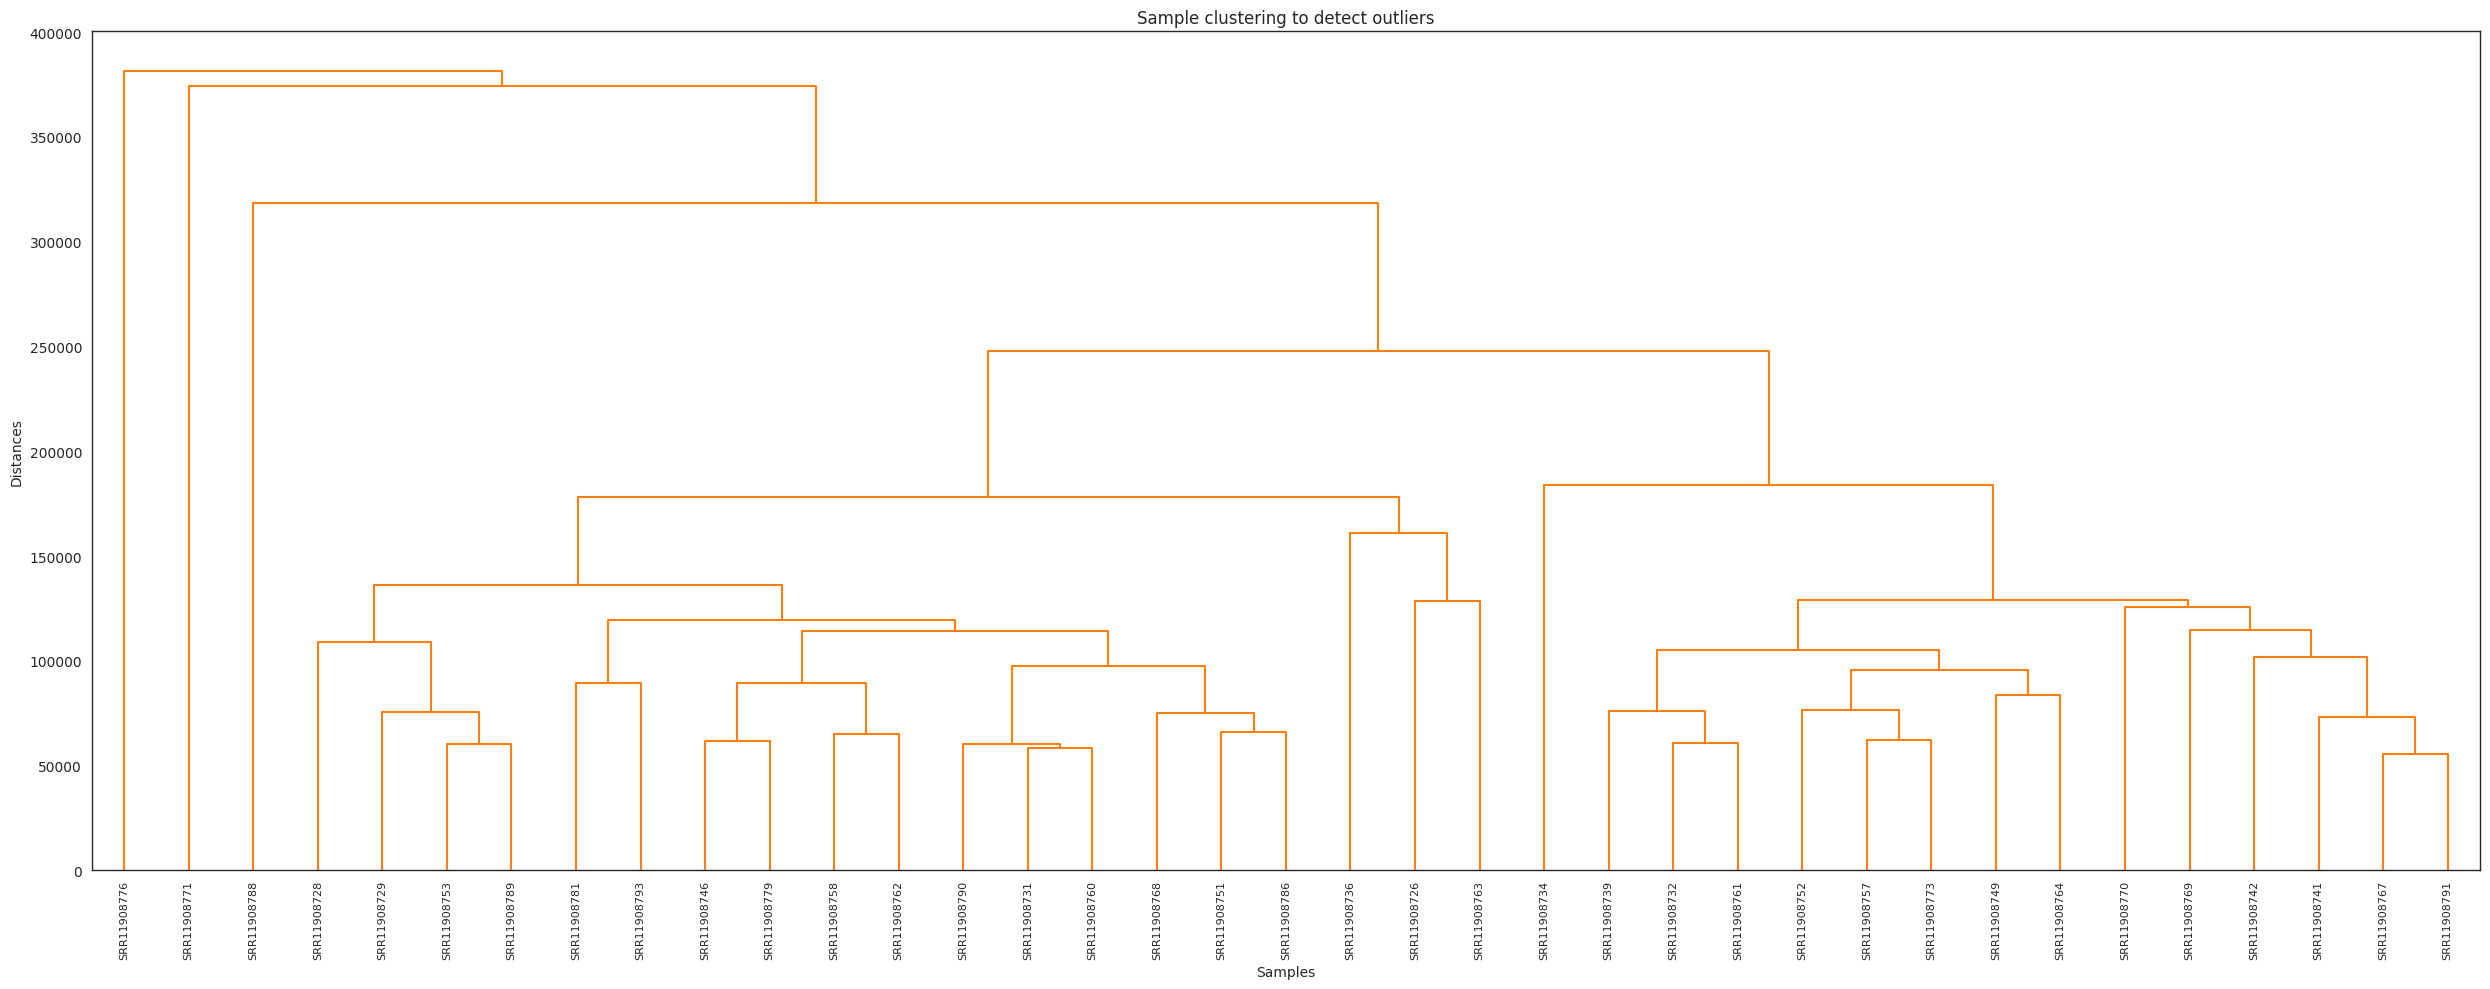

In [5]:
pyWGCNA_CC.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1702
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.021899 -0.172141       0.670951  4264.508647  4219.750531   
1       2  0.456597 -1.135825       0.829196  1558.332051   1381.06819   
2       3  0.660794 -1.430336       0.921181    705.61045   576.497881   
3       4  0.740134 -1.663746       0.945745   366.721098    270.93623   
4       5  0.712763 -1.973421       0.909159    210.36811   139.633024   
5       6  0.706428 -2.161101        0.91004   130.118246     77.44482   
6       7  0.695312  -2.32007       0.927335    85.456402    45.284642   
7       8  0.713348 -2.347545       0.944901    58.957401    27.891233   
8       9  0.716199 -2.343156       0.948848    42.393577    17.789041   
9      10  0.711427 -2.273428       0.941471    31.580571    11.718122   
10     11  0.688822 -2.178692       0.901846    24.257001     7.836933   
11     13

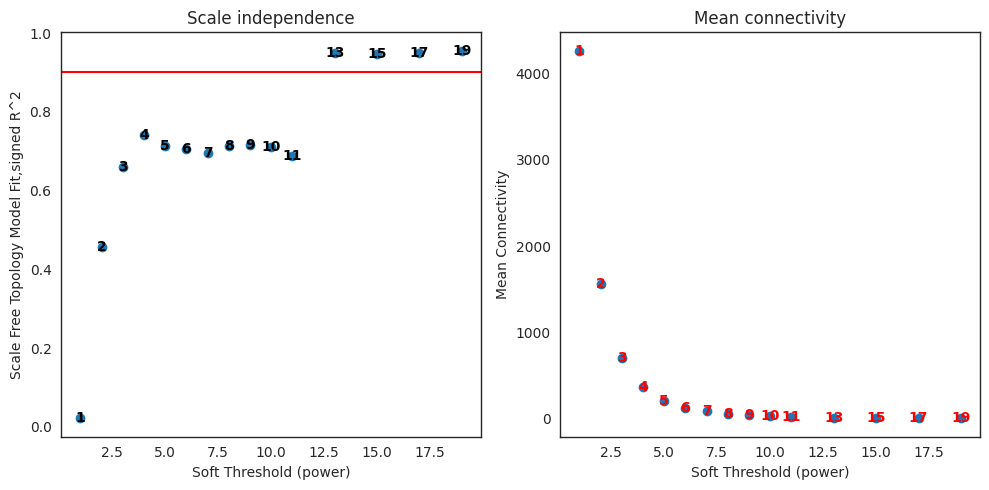

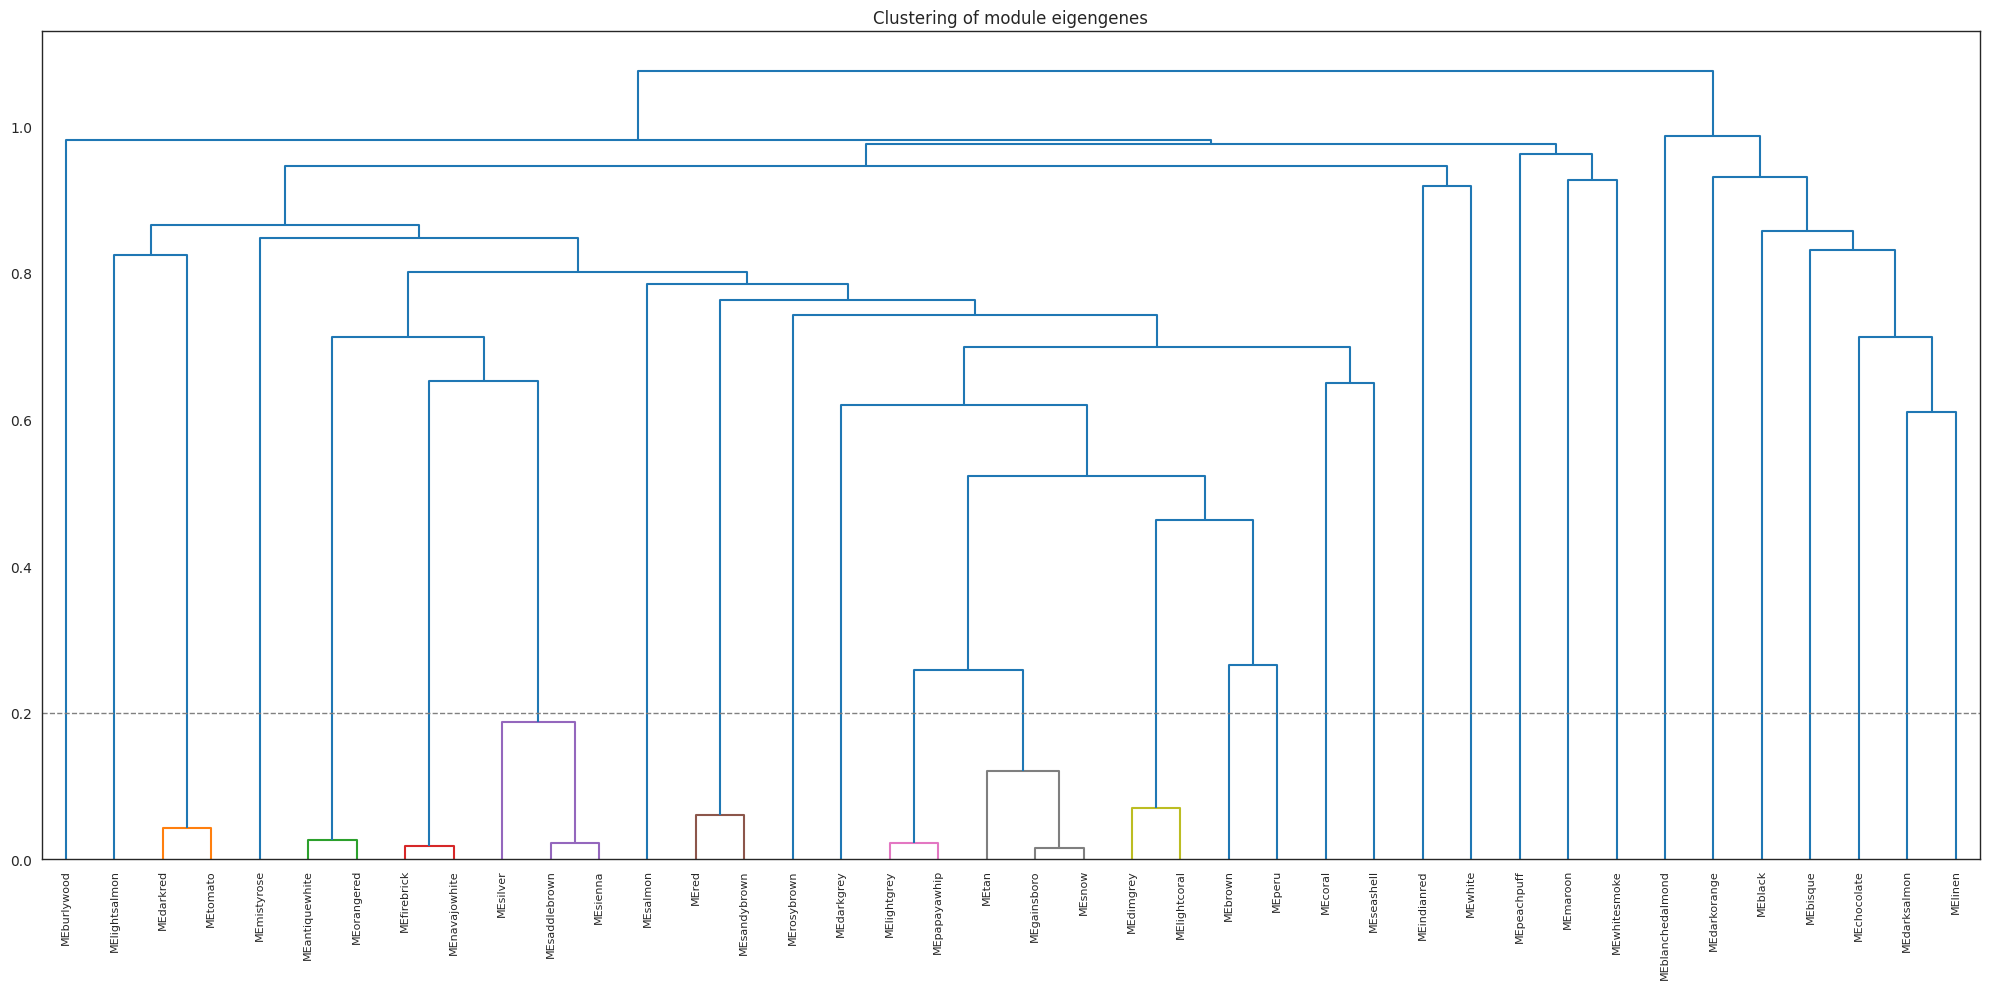

In [10]:
pyWGCNA_CC.findModules()

In [6]:
metadata = pd.read_csv('/content/drive/MyDrive/metadata.csv',index_col=0)
metadata['Grade'].value_counts()

IIb     11
Ib2      9
IIIb     8
Ib1      5
IVa      1
?IIb     1
IIIa     1
IVb      1
Name: Grade, dtype: int64

In [7]:
pyWGCNA_CC.updateSampleInfo(path='/content/drive/MyDrive/metadata.csv', sep=',')

In [8]:
pyWGCNA_CC.setMetadataColor('Grade', {'Ib1': 'blue', 'Ib2': 'blue','IIb': 'blue','?IIb': 'blue',
                                      'IIIa':'red','IIIb':'red','IVa':'red','IVb':'red'})

In [11]:
pyWGCNA_CC.analyseWGCNA()

Analysing WGCNA...
Calculating module trait relationship ...


ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7ff5fd95f910> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 4500x0 with 2 Axes>

rewrite the code

"'box_aspect' and 'fig_aspect' must be positive"
→　"'box_aspect' and 'fig_aspect' must be posi"

In [12]:
pyWGCNA_CC.analyseWGCNA()

Analysing WGCNA...
Calculating module trait relationship ...


ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7ff5fd95f910> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 4500x0 with 2 Axes>

In [13]:
%load_ext autoreload
%autoreload 2

In [16]:
pyWGCNA_CC.analyseWGCNA()

Analysing WGCNA...
Calculating module trait relationship ...


ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7ff5fd95f910> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 4500x0 with 2 Axes>

Code rewrite is not reflected